# imports

In [1]:
from glob import glob
import gc
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2 as cv
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split

from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D 
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

In [2]:
# listing the flower classes
import os 
os.listdir("./flowers")

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [3]:
base_path = './flowers/'
categories = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

# loading file names 

In [4]:
fnames = []
for category in categories:
    flower_folder = os.path.join(base_path, category)
    file_names = os.listdir(flower_folder)
    full_path = [os.path.join(flower_folder, file_name) for file_name in file_names]
    fnames.append(full_path)

In [5]:
fnames

[['./flowers/daisy\\100080576_f52e8ee070_n.jpg',
  './flowers/daisy\\10140303196_b88d3d6cec.jpg',
  './flowers/daisy\\10172379554_b296050f82_n.jpg',
  './flowers/daisy\\10172567486_2748826a8b.jpg',
  './flowers/daisy\\10172636503_21bededa75_n.jpg',
  './flowers/daisy\\102841525_bd6628ae3c.jpg',
  './flowers/daisy\\10300722094_28fa978807_n.jpg',
  './flowers/daisy\\1031799732_e7f4008c03.jpg',
  './flowers/daisy\\10391248763_1d16681106_n.jpg',
  './flowers/daisy\\10437754174_22ec990b77_m.jpg',
  './flowers/daisy\\10437770546_8bb6f7bdd3_m.jpg',
  './flowers/daisy\\10437929963_bc13eebe0c.jpg',
  './flowers/daisy\\10466290366_cc72e33532.jpg',
  './flowers/daisy\\10466558316_a7198b87e2.jpg',
  './flowers/daisy\\10555749515_13a12a026e.jpg',
  './flowers/daisy\\10555815624_dc211569b0.jpg',
  './flowers/daisy\\10555826524_423eb8bf71_n.jpg',
  './flowers/daisy\\10559679065_50d2b16f6d.jpg',
  './flowers/daisy\\105806915_a9c13e2106_n.jpg',
  './flowers/daisy\\10712722853_5632165b04.jpg',
  './flow

# loading files 

In [6]:
# train, test = train_test_split(fnames[0], train_size=0.8)
images = []
for names in fnames:
    one_category_images = [cv.imread(name) for name in names if (cv.imread(name)) is not None]
    images.append(one_category_images)

displaying the images 

In [10]:
# function that converts from BGR to RGB color space
def cvtRGB(img):
    return cv.cvtColor(img.copy(), cv.COLOR_BGR2RGB)

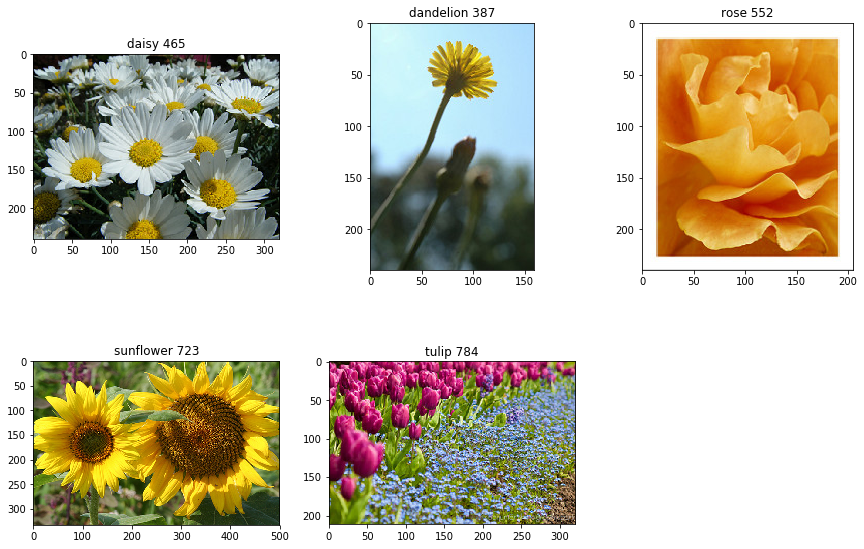

In [11]:
# plotting the images 
plt.figure(figsize=(15,10))
for i, imgs in enumerate(images):
    plt.subplot(2,3,i+1)
    idx = np.random.randint(len(imgs))
    plt.imshow(cvtRGB(imgs[idx]))
    plt.grid('off')
    plt.title(categories[i]+' '+str(idx))
plt.show()

# Resizing the images to 256x256

In [7]:
img_width, img_height = 256, 256

resized_images = []
for i,imgs in enumerate(images):
    resized_images.append([cv.resize(img, (img_width, img_height), interpolation = cv.INTER_CUBIC) for img in imgs])

Split dataset to 80% of training and 20% of validation¶


In [8]:
train_images = []
val_images = []
for imgs in resized_images:
    train, test = train_test_split(imgs, train_size=0.8, test_size=0.2)
    train_images.append(train)
    val_images.append(test)

# Creating labels 


In [9]:
len_train_images = [len(imgs) for imgs in train_images]
print(len_train_images)
print('sum of train images:', np.sum(len_train_images))
train_categories = np.zeros((np.sum(len_train_images)), dtype='uint8')
for i in range(5):
    if i is 0:
        train_categories[:len_train_images[i]] = i
    else:
        train_categories[np.sum(len_train_images[:i]):np.sum(len_train_images[:i+1])] = i
        
len_val_images = [len(imgs) for imgs in val_images]
print(len_val_images)
print('sum of val_images:', np.sum(len_val_images))
val_categories = np.zeros((np.sum(len_val_images)), dtype='uint8')
for i in range(5):
    if i is 0:
        val_categories[:len_val_images[i]] = i
    else:
        val_categories[np.sum(len_val_images[:i]):np.sum(len_val_images[:i+1])] = i

[615, 841, 627, 587, 787]
sum of train images: 3457
[154, 211, 157, 147, 197]
sum of val_images: 866


Convert image data to numpy array

In [10]:
tmp_train_imgs = []
tmp_val_imgs = []
for imgs in train_images:
    tmp_train_imgs += imgs
for imgs in val_images:
    tmp_val_imgs += imgs
train_images = np.array(tmp_train_imgs)
val_images = np.array(tmp_val_imgs)

In [11]:
print('Before converting')
print('train data:', train_images.shape)
print('train labels:', train_categories.shape)

train_data = train_images.astype('float32')
val_data = val_images.astype('float32')
train_labels = np_utils.to_categorical(train_categories, len(categories))
val_labels = np_utils.to_categorical(val_categories, len(categories))
print()
print('After converting')
print('train data:', train_data.shape)
print('train labels:', train_labels.shape)

Before converting
train data: (3457, 256, 256, 3)
train labels: (3457,)

After converting
train data: (3457, 256, 256, 3)
train labels: (3457, 5)


# Shuffle the dataset (set a seed and randomize both the data and the labels)

In [12]:
seed = 100
np.random.seed(seed)
np.random.shuffle(train_data)
np.random.seed(seed)
np.random.shuffle(train_labels)
np.random.seed(seed)
np.random.shuffle(val_data)
np.random.seed(seed)
np.random.shuffle(val_labels)

In [13]:
train_data = train_data[:3400]
train_labels = train_labels[:3400]
val_data = val_data[:860]
val_labels = val_labels[:860]
print('shape of train data:', train_data.shape)
print('shape of train labels:', train_labels.shape)
print('shape of val data:', val_data.shape)
print('shape of val labels:', val_labels.shape)

gc.collect()

shape of train data: (3400, 256, 256, 3)
shape of train labels: (3400, 5)
shape of val data: (860, 256, 256, 3)
shape of val labels: (860, 5)


7

# Building our model

In [14]:
def create_model_from_scratch():

    """
     train from scratch
    """
    model = Sequential()
    model.add(Conv2D(16, (3,3), padding='same', input_shape=train_data.shape[1:], activation='relu', name='conv_1'))
    model.add(Conv2D(16, (3,3), activation='relu', name='conv_2'))
    model.add(MaxPooling2D(pool_size=(2,2), name='maxpool_1'))
    model.add(Dropout(0.25))

    model.add(Conv2D(32, (3,3), padding='same', activation='relu', name='conv_3'))
    model.add(Conv2D(32, (3,3), activation='relu', name='conv_4'))
    model.add(MaxPooling2D(pool_size=(2,2), name='maxpool_2'))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(32, (3,3), padding='same', activation='relu', name='conv_5'))
    model.add(Conv2D(32, (3,3), activation='relu', name='conv_6'))
    model.add(MaxPooling2D(pool_size=(2,2), name='maxpool_3'))

    model.add(Flatten())
    model.add(Dense(256, activation='relu', name='dense_1'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu', name='dense_2'))
    model.add(Dense(len(categories), name='output'))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc']) # optimizer=RMSprop(lr=0.001)
    
    return model

model summary

In [15]:
model_scratch = create_model_from_scratch()
model_scratch.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
conv_2 (Conv2D)              (None, 254, 254, 16)      2320      
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 127, 127, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 127, 127, 16)      0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 127, 127, 32)      4640      
_________________________________________________________________
conv_4 (Conv2D)              (None, 125, 125, 32)      9248      
____

# Preparing the data

In [16]:
# Parameters
batch_size = 32
epochs1 = 50
epochs2 = 10
epochs3 = 30

# Creating the generator

In [17]:
# shear_range, zoom_range, and horizontal flip to our ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True
)

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(
    rescale=1./255,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True
)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow(
    train_data,
    train_labels,
    batch_size=batch_size
)

val_generator = val_datagen.flow(
    val_data,
    val_labels,
    batch_size=batch_size
)

# training the model

In [ ]:
import time
start = time.time()

model_scratch_info = model_scratch.fit_generator(
    generator=train_generator, 
    steps_per_epoch=len(train_data)/batch_size,   # -> 106 # images 3392 = steps * batch_size = 106 * 32 
    epochs=epochs1, 
    validation_steps=len(val_data)/batch_size, # -> 26 # images 832 = steps * batch_size = 26 * 32
    validation_data=val_generator, 
    verbose=2
)

end = time.time()
duration = end - start
print ('\n model_scratch took %0.2f seconds (%0.1f minutes) to train for %d epochs'%(duration, duration/60, epochs1) )

Epoch 1/50
107/106 - 63s - loss: 1.6075 - acc: 0.2300 - val_loss: 1.6072 - val_acc: 0.2244
Epoch 2/50
